In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np

In [7]:
!pip install pd

  Created wheel for pd: filename=pd-0.0.1-py3-none-any.whl size=6506 sha256=21303d284c9870ad47017988fc8e6d5c257ad7bd533c83c199319c42f3304574
  Stored in directory: /Users/debunt/Library/Caches/pip/wheels/c0/45/39/f9063988f991ef39fdbe4e5f2c0e9085e3e0ab0465602e33da
Successfully built pd


In [4]:
def create_time_features(df,time_column='date', label=None):
    """
    Creates time series features from datetime index
    """
    if time_column == 'starts_at':
        df[time_column]=df[time_column]-pd.Timedelta(hours=3)
    df[time_column+'_hour'] = df[time_column].dt.hour
    df[time_column+'_dayofweek'] = df[time_column].dt.dayofweek
    df[time_column+'_quarter'] = df[time_column].dt.quarter
    df[time_column+'_month'] = df[time_column].dt.month
    df[time_column+'_year'] = df[time_column].dt.year
    df[time_column+'_dayofyear'] = df[time_column].dt.dayofyear
    df[time_column+'_dayofmonth'] = df[time_column].dt.day
    df[time_column+'_weekofyear'] = df[time_column].dt.weekofyear
    
    df=df.drop(columns=[time_column])
    X = df
    if label:
        y = df[label]
        return X, y
    return X

In [10]:
df = pd.read_csv(r'/Volumes/Seagate Expansion Drive/Hackatons_data/part1.csv')

# df['brand'].fillna('nan', inplace=True)
df['regular_price'].fillna(0, inplace=True)
df['product_id'].fillna(-1, inplace=True)

# df= df.dropna(subset=['product_id','regular_price','brand'])

df.promotion_price.fillna(0, inplace=True)

df['promotion_price']=(df['promotion_price'] > 0).astype(int)

df = df.drop(columns=['Unnamed: 0','product_name','shopper_login'])#,'collection_day'])
df['collection_day'] = pd.to_datetime(df['collection_day'])
df['starts_at'] = pd.to_datetime(df['starts_at'])
df['completed_at'] = pd.to_datetime(df['completed_at'])

# df = create_time_features(df, time_column='collection_day')
# df = create_time_features(df, time_column='starts_at')
# df = create_time_features(df, time_column='completed_at')

df["category"] = df["category"].apply(lambda x: x.lower())

In [150]:
df = df.sort_values("starts_at")
df.columns

Index(['department', 'quantity', 'category', 'package_type', 'not_found',
       'store_id', 'stock', 'brand', 'collection_day', 'product_id', 'city',
       'promotion_price', 'regular_price', 'completed_at', 'starts_at',
       'order_identifier'],
      dtype='object')

In [ ]:
from tqdm import tqdm_notebook
def foo(row):
    if row["not_found"] == 0:
        return (foo.last_found - row["starts_at"]).days
    else:
        foo.last_found = row["starts_at"]
        return 0
    
for id1,group1 in tqdm_notebook(df.groupby("store_id")):
    
    for prod2, group2 in tqdm_notebook(group1.groupby('product_id')):
        foo.last_found = group2.at[group2["starts_at"].index[0], "starts_at"]
        for idd, row in group2.iterrows():
#             print(idd)
            df.at[idd, "diff"] = foo(row)



/Users/debunt/Work_Learning/programming/Jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


/Users/debunt/Work_Learning/programming/Jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [171]:
df.head()

,department,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,city,promotion_price,regular_price,completed_at,starts_at,order_identifier
3181857,МОЛОЧНЫЕ,1,молоко,ШТУКА,0,14,1525.0,RIOBA,2017-01-09,9959.0,1,0,57.950,2017-01-09 07:26:00,2017-01-09 11:00:00,338528
1536251,КОНСЕРВЫ,1,уход за животными,ШТУКА,1,12,181.0,ARO,2017-01-09,84059.0,1,0,64.988,2017-01-09 05:42:00,2017-01-09 11:00:00,338513
3182090,МОЛОЧНЫЕ,1,молочные продукты,ШТУКА,0,12,3.0,ЧУДО,2017-01-09,39569.0,1,0,42.245,2017-01-09 05:42:00,2017-01-09 11:00:00,338513
3182091,МОЛОЧНЫЕ,4,сливки,ШТУКА,0,12,377.0,FINE LIFE,2017-01-09,14508.0,1,0,54.845,2017-01-09 05:42:00,2017-01-09 11:00:00,338513
605609,ЗАМОРОЗКА,1,замороженный картофель,ШТУКА,0,14,105.0,HORECA SELECT,2017-01-09,37260.0,1,0,246.446,2017-01-09 07:26:00,2017-01-09 11:00:00,338528


In [ ]:
df.to_csv("part1_diff.csv")

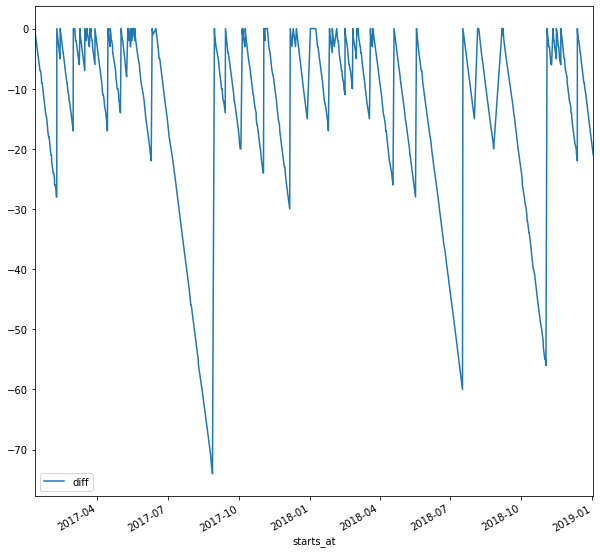

In [158]:
from tqdm import tqdm_notebook
for id1,group1 in tqdm_notebook(df.groupby("store_id")):
    for prod2, group2 in tqdm_notebook(group1.groupby('product_id')):
        last_found = group2.at[group2["starts_at"].index[0], "starts_at"]
        for i, row in group2.iterrows():
            if row["not_found"] == 0:
                group2.at[i, "diff"] = (last_found - row["starts_at"]).days
            else:
                last_found = row["starts_at"]
                group2.at[i, "diff"] = 0

In [3]:
df = pd.read_csv(r'd:\Загрузки\part1.csv')

In [9]:
# Функция preprocess_customer выполняет препроцессинг датасета customer. Сейчас можно выбрать
# один или несколько способов закодировать категориальные переменные - One Hot Encoding,
# Frequency encoding и mean encoding. Соответственно, в encodings надо передавать занчения 'mean',
# 'one-hot' или 'frequency'. Label Encoding будет по умолчанию.
def preprocess_customer(customer, categories, encodings=[], drop_original=False, most_often_departments=15, most_often_categories=15):
    cust = customer.copy()


    # job_title переводим в нижний регистр
    for category in categories:
        cust[category] = cust[category].str.lower()


    # Кодируем и заполняем пропуски
    cust = label_encode_customer(cust, categories)

    for encoding in encodings:
        if encoding == 'one-hot':
            common_jobs = cust['department'].value_counts().index[:most_often_departments]
            cust['department'] = cust['department'].apply(lambda x:
                                                        x if x in common_jobs else -1)
            common_jobs = cust['category'].value_counts().index[:most_often_categories]
            cust['category'] = cust['category'].apply(lambda x:
                                                        x if x in common_jobs else -1)
            columns_to_encode = categories
            for col in columns_to_encode:
                one_hot = pd.get_dummies(cust[col])
                one_hot.columns = [f'{col}_one_hot_{str(val)}' for val in one_hot.columns]
                cust = pd.concat([cust, one_hot], axis=1)


    return cust


### создаю словарик с категориями и hash значением (порядковым номером)

In [151]:
from collections import defaultdict
categories = ['department','category','package_type','brand']
# df = preprocess_customer(df, categories)
good_types = defaultdict() #
for i, name in enumerate(df["category"].unique()):
    good_types[name] = i
df["category"] = df["category"].apply(lambda x: good_types[x]) # имена в категории заменяю числом

### df_notfound_rate

In [168]:
for hour in df["starts_at_hour"].unique():
    df["starts_at_hour"] == "hour"

array([18, 13,  9, 15, 10,  6, 17,  8,  5, 11, 12,  7, 16, 19, 14, 20,  4],
      dtype=int64)

In [171]:
df.head()

,Unnamed: 0,department,product_name,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,city,promotion_price,regular_price,completed_at,starts_at,order_identifier,shopper_login
0,0,GIFTS (HAMPERS),75Г ШОК.ТЕМ.ЭКВАДОР75% BARATTI,1,Подарочные корзины,ШТУКА,1,10,2.0,BARATTI,2018-04-10 00:00:00,4592903.0,1,NaN,78.650,2018-04-09 16:31:00,2018-04-10 21:00:00,925225,len_kd94
1,1,GIFTS (HAMPERS),75Г ШОК.ГОР.АПЕЛ\МИНД.BARATTI,1,Подарочные корзины,ШТУКА,1,10,17.0,BARATTI,2018-04-10 00:00:00,4592883.0,1,NaN,77.390,2018-04-09 16:31:00,2018-04-10 21:00:00,925225,len_kd94
2,2,GIFTS (HAMPERS),"20X1,8Г ЧАЙ ЗЕЛ МОХИТО CURTIS",1,Подарочные корзины,ШТУКА,1,8,91.0,CURTIS,2018-04-10 00:00:00,67225.0,1,NaN,49.643,2018-04-10 12:21:00,2018-04-10 16:00:00,883302,shel_pn96
3,3,GIFTS (HAMPERS),75Г ШОК.ТЕМ.ЭКВАДОР75% BARATTI,1,Подарочные корзины,ШТУКА,1,67,5.0,BARATTI,2018-04-13 00:00:00,4592903.0,3,NaN,78.650,2018-04-12 20:22:00,2018-04-13 12:00:00,932567,sib_ss95
4,4,GIFTS (HAMPERS),"20X1,8Г ЧАЙ ЧЕР.ФРАН.ТРЮФ.CURT",2,Подарочные корзины,ШТУКА,1,12,1.0,CURTIS,2018-04-12 00:00:00,67976.0,1,NaN,49.643,2018-04-12 13:28:00,2018-04-12 18:00:00,932006,dubr_pu83


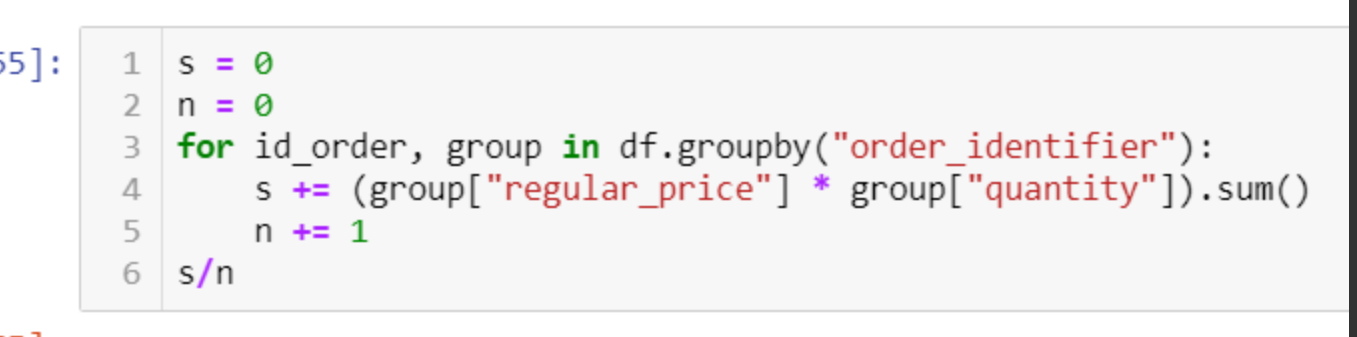

In [20]:
# df_cost = {"id_order" : list(), "sum" : list(), "year" : list(), "month" : list()}
df = pd.read_csv(r'd:\Загрузки\part1.csv')
df['starts_at'] = pd.to_datetime(df['starts_at'])
df = create_time_features(df, time_column='starts_at')
for id_order, group in df.groupby("order_identifier"):
    df_cost["id_order"].append(id_order)
    df_cost["sum"].append((group["regular_price"] * group["quantity"]).sum())
    df_cost["month"].append(group.at[group.index[0], "starts_at_month"])
    df_cost["year"].append(group.at[group.index[0], "starts_at_year"])
    
_dfDataFrame= pd.DataFrame.from_dict(df_cost)
_dfDataFrame.head()

,id_order,sum,year,month
0,98951,1859.281,2017,9
1,115757,8403.836,2017,11
2,136868,4274.752,2017,5
3,141469,6992.073,2017,3
4,172343,3123.386,2018,2


In [37]:
for year in _dfDataFrame["year"].unique():
    print("year",year, _dfDataFrame[_dfDataFrame["year"] == year].size / 12)

year 2017 69047.33333333333
year 2018 203071.66666666666
year 2019 766.0
year 2020 15600.0


In [44]:
df[df["starts_at_year"] == 2017]["order_identifier"].unique().size

2190

In [57]:
df1 = pd.read_csv(r'd:\Загрузки\part1.csv')


In [58]:
df1['starts_at'] = pd.to_datetime(df1['starts_at'])
df1 = create_time_features(df1, time_column='starts_at')

In [59]:
df1[df1["starts_at_year"] == 2017].size

26788242

In [60]:
s = 0
_kk  = df1[df1["starts_at_year"] == 2017]
s = (_kk["regular_price"] * _kk["quantity"]).sum()
_kk  = df1[df1["starts_at_year"] == 2018]
s += (_kk["regular_price"] * _kk["quantity"]).sum()
s / 24

76416888.49812503

In [62]:
4500 * 400000/24

75000000.0

In [72]:
x1 = df1[df1["starts_at_year"] == 2017]["order_identifier"].unique().shape[0]
x2 = df1[df1["starts_at_year"] == 2018]["order_identifier"].unique().shape[0]
(x1 + x2)/24


16913.041666666668

In [83]:
df_cost = {"sum" : list()}
x1 = df1[df1["starts_at_year"] == 2018]
# x2 = df1[df1["starts_at_year"] == 2018]["order_identifier"].unique().shape[0]
for id_order, group in x1.groupby("order_identifier"):
    df_cost["sum"].append((group["regular_price"] * group["quantity"]).sum())

In [112]:
# _dfDataFrame2017 = pd.DataFrame.from_dict(df_cost) 
pd.DataFrame({"s" : [_dfDataFrame2017["sum"] > 11000]})

,s
0,0 False 1 False 2 Fals...


In [117]:
(_dfDataFrame2018[_dfDataFrame2018["sum"] < 1500].size + _dfDataFrame2017[_dfDataFrame2017["sum"] < 1500].size) / (_dfDataFrame2018.size + _dfDataFrame2017.size)

0.3649057803026757

In [121]:
x1 = _dfDataFrame2018[_dfDataFrame2018["sum"] > 5000]

(_dfDataFrame2018[x1["sum"] < 11500].size + _dfDataFrame2017[_dfDataFrame2017["sum"] < 5000].size) / (_dfDataFrame2018.size + _dfDataFrame2017.size)

d:\jupyter\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [116]:
# _dfDataFrame2018 = pd.DataFrame.from_dict(df_cost) 
(_dfDataFrame2018[_dfDataFrame2018["sum"] < 1500].size + _dfDataFrame2017[_dfDataFrame2017["sum"] < 1500].size)

148120

In [201]:
_dfDataFrame= pd.DataFrame.from_dict(df_cost) 
print("Средний чек в группе больше 11000 руб - ", int(_dfDataFrame[_dfDataFrame["sum"] > 11000]["sum"].mean()), "руб")

fraction = _dfDataFrame[_dfDataFrame["sum"] > 11000].size / _dfDataFrame.size

print("Отношение чеков > 11000 ко всем заказам - ", fraction * 100, "%")

Средний чек в группе больше 11000 руб -  30842 руб
Отношение чеков > 11000 ко всем заказам -  4.828211749888787 %


In [16]:
for id_order, group in df.groupby("order_identifier"):
    df_cost["id_order"].append(id_order)
    df_cost["sum"].append((group["regular_price"] * group["quantity"]).sum())
    df_cost["month"].append(group.at[group.index[0], "starts_at_month"])
    df_cost["year"].append(group.at[group.index[0], "starts_at_year"])
    break

In [17]:
df_cost

{'id_order': [98951, 98951, 98951, 98951],
 'sum': [1859.281, 1859.281, 1859.281, 1859.281],
 'year': [2017, 2017],
 'month': [9, 9]}

In [200]:
df = pd.read_csv(r'd:\Загрузки\part3.csv')
for id_order, group in df.groupby("order_identifier"):
    df_cost["id_order"].append(id_order)
    df_cost["sum"].append((group["regular_price"] * group["quantity"]).sum())

In [123]:
(4500 * 100 / 90) * 0.95

4750.0

In [130]:
(16900 * 30800) / 24 * 0.1

2168833.3333333335

In [132]:
0.048 * 16900 * 30800 * 0.1 

2498496.0

In [141]:
((0.048 * 16900 + 10) * 30800 * 0.1 - 2500000)/2500000

0.0117184

## Удаляю лишние столбцы

In [152]:
df_train = df.drop(columns=["order_identifier", "completed_at", "starts_at_weekofyear", "collection_day", "department","regular_price", "starts_at_year", "package_type", "brand", "starts_at_dayofmonth", "starts_at_dayofyear", "starts_at_quarter"])
df_train.head()

,quantity,category,not_found,store_id,stock,product_id,city,promotion_price,starts_at_hour,starts_at_dayofweek,starts_at_month
0,1,0,1,10,2.0,4592903.0,1,0,18,1,4
1,1,0,1,10,17.0,4592883.0,1,0,18,1,4
2,1,0,1,8,91.0,67225.0,1,0,13,1,4
3,1,0,1,67,5.0,4592903.0,3,0,9,4,4
4,2,0,1,12,1.0,67976.0,1,0,15,3,4


In [153]:
y=df_train['not_found']
X = df_train.drop(columns=['not_found'])

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)

In [155]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100,task_type="CPU",devices='-1')
model.fit(X_train,y_train,verbose=Truex`)

Learning rate set to 0.5
0:	learn: 0.4423476	total: 680ms	remaining: 1m 7s
1:	learn: 0.3564806	total: 1.47s	remaining: 1m 11s
2:	learn: 0.3210543	total: 2.22s	remaining: 1m 11s
3:	learn: 0.3057882	total: 2.93s	remaining: 1m 10s
4:	learn: 0.2993847	total: 3.6s	remaining: 1m 8s
5:	learn: 0.2963210	total: 4.21s	remaining: 1m 5s
6:	learn: 0.2949205	total: 4.83s	remaining: 1m 4s
7:	learn: 0.2939392	total: 5.46s	remaining: 1m 2s
8:	learn: 0.2933334	total: 5.98s	remaining: 1m
9:	learn: 0.2928397	total: 6.69s	remaining: 1m
10:	learn: 0.2925630	total: 7.24s	remaining: 58.6s
11:	learn: 0.2921794	total: 7.76s	remaining: 56.9s
12:	learn: 0.2917313	total: 8.28s	remaining: 55.4s
13:	learn: 0.2915208	total: 8.8s	remaining: 54.1s
14:	learn: 0.2912668	total: 9.37s	remaining: 53.1s
15:	learn: 0.2911114	total: 9.93s	remaining: 52.1s
16:	learn: 0.2908499	total: 10.5s	remaining: 51.2s
17:	learn: 0.2905091	total: 11.1s	remaining: 50.4s
18:	learn: 0.2902906	total: 11.6s	remaining: 49.6s
19:	learn: 0.2901589	

### Метрики модели

In [146]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score

print('Accuracy', accuracy_score(y_train, model.predict(X_train)))
print('Precision', precision_score(y_train, model.predict(X_train)))
print('Recall', recall_score(y_train, model.predict(X_train)))
print('f1', f1_score(y_train, model.predict(X_train)))
#print(cv_model['logisticregressioncv'].C_)
print("----Test-----")
print('Accuracy', accuracy_score(y_test, model.predict(X_test)))
print('Precision', precision_score(y_test, model.predict(X_test)))
print('Recall', recall_score(y_test, model.predict(X_test)))
print('f1', f1_score(y_test, model.predict(X_test)))


Accuracy 0.903833125
Precision 0.652986651420617
Recall 0.08207959555434738
f1 0.14582870719900518
----Test-----
Accuracy 0.9033325
Precision 0.6334629574234719
Recall 0.07940158228243617
f1 0.14111505997334517


In [156]:
roc_auc_score(y_test, model.predict(X_test))

0.535244091759697

### Тест на part3

In [117]:
df_part3 = pd.read_csv(r'd:\Загрузки\part3.csv')
# df['brand'].fillna('nan', inplace=True)
df_part3['regular_price'].fillna(0, inplace=True)
df_part3['product_id'].fillna(-1, inplace=True)
df_part3.promotion_price.fillna(0, inplace=True)
df_part3['promotion_price']=(df_part3['promotion_price']>0).astype(int)
df_part3 = df_part3.drop(columns=['Unnamed: 0','product_name','shopper_login'])#,'collection_day'])
df_part3['starts_at'] = pd.to_datetime(df_part3['starts_at'])
df_part3 = create_time_features(df_part3, time_column='starts_at')

df_part3["category"] = df_part3["category"].apply(lambda x: x.lower())
df_part3.head()

,department,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,...,completed_at,order_identifier,starts_at_hour,starts_at_dayofweek,starts_at_quarter,starts_at_month,starts_at_year,starts_at_dayofyear,starts_at_dayofmonth,starts_at_weekofyear
0,МОЛОЧНЫЕ,2,СЛИВКИ,ШТУКА,1,11,59.0,PARMALAT,2019-12-30 00:00:00,14535.0,...,2019-12-29 00:28:00,2765223,14,0,4,12,2019,364,30,1
1,ЗАМОРОЗКА,1,ЗАМОРОЖЕННЫЕ ФРУКТЫ,ШТУКА,0,11,16.0,METRO CHEF,2019-12-30 00:00:00,4276471.0,...,2019-12-29 00:28:00,2765223,14,0,4,12,2019,364,30,1
2,ЗАМОРОЗКА,1,ЗАМОРОЖЕННЫЕ ФРУКТЫ,ШТУКА,0,11,83.0,RAVIFRUIT,2019-12-30 00:00:00,5047609.0,...,2019-12-29 00:28:00,2765223,14,0,4,12,2019,364,30,1
3,ЗАМОРОЗКА,1,ЗАМОРОЖЕННЫЕ ФРУКТЫ,ШТУКА,0,11,26.0,RAVIFRUIT,2019-12-30 00:00:00,5047607.0,...,2019-12-29 00:28:00,2765223,14,0,4,12,2019,364,30,1
4,ЗАМОРОЗКА,1,ЗАМОРОЖЕННЫЕ ФРУКТЫ,ШТУКА,0,11,27.0,RAVIFRUIT,2019-12-30 00:00:00,5047612.0,...,2019-12-29 00:28:00,2765223,14,0,4,12,2019,364,30,1


In [118]:
categories = ['department','category','package_type','brand']
# df = preprocess_customer(df, categories)
max_prev = max(good_types.values()) + 1
for name in df_part3["category"].unique():
    if name not in good_types.keys():
        good_types[name] = max_prev
        max_prev += 1
df_part3["category"] = df_part3["category"].apply(lambda x: good_types[x]) # имена в категории заменяю числом

## Удаляю лишние столбцы

In [119]:
df_part3 = df_part3.drop(columns=["order_identifier", "completed_at", "collection_day", "department", "package_type", "brand", "starts_at_dayofmonth", "starts_at_year", "starts_at_dayofyear", "starts_at_quarter"])
df_part3.head()

,quantity,category,not_found,store_id,stock,product_id,city,promotion_price,regular_price,starts_at_hour,starts_at_dayofweek,starts_at_month,starts_at_weekofyear
0,2,120,1,11,59.0,14535.0,1,1,79.469,14,0,12,1
1,1,57,0,11,16.0,4276471.0,1,0,369.890,14,0,12,1
2,1,57,0,11,83.0,5047609.0,1,0,662.390,14,0,12,1
3,1,57,0,11,26.0,5047607.0,1,0,527.390,14,0,12,1
4,1,57,0,11,27.0,5047612.0,1,0,487.637,14,0,12,1


### Метрики модели

In [123]:
df_part3_test = df_part3.dropna()
y_pred = model.predict(df_part3_test.drop(columns="not_found"))
print('Accuracy', accuracy_score(df_part3_test["not_found"], y_pred))
print('Precision', precision_score(df_part3_test["not_found"], y_pred))
print('Recall', recall_score(df_part3_test["not_found"], y_pred))
print('f1', f1_score(df_part3_test["not_found"], y_pred))



Accuracy 0.8521598412454671
Precision 0.26645146490135674
Recall 0.1682392865272001
f1 0.2062505549143212


In [127]:
roc_auc_score(df_part3_test["not_found"], y_pred)

0.5542724296347037

In [126]:
df_part3_test

,quantity,category,not_found,store_id,stock,product_id,city,promotion_price,regular_price,starts_at_hour,starts_at_dayofweek,starts_at_month,starts_at_weekofyear
0,2,120,1,11,59.00,14535.0,1,1,79.469,14,0,12,1
1,1,57,0,11,16.00,4276471.0,1,0,369.890,14,0,12,1
2,1,57,0,11,83.00,5047609.0,1,0,662.390,14,0,12,1
3,1,57,0,11,26.00,5047607.0,1,0,527.390,14,0,12,1
4,1,57,0,11,27.00,5047612.0,1,0,487.637,14,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852464,1,128,1,111,60.35,5481861.0,16,0,157.778,10,1,1,4
852465,1,41,0,111,107.00,12857.0,16,0,102.959,10,1,1,4
852466,2,92,0,111,1112.00,49915.0,16,0,46.412,10,1,1,4
852467,1,248,0,121,8.00,5215877.0,14,1,1277.387,12,1,1,4
